In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Multiple Linear Regression With Regularization From scratch

Multiple linear regression model :

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b $$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  $$ 


In [5]:
def modle (x,w,b):
    m = x.shape[0]
    f_wb = []
    for i in range(m):
        f_wb.append(np.dot(w,x[i]) + b) 
    return f_wb

# Total Cost: 
$$
\begin{align}
\frac{1}{2m}\sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  \\
\end{align}
$$

In [6]:
def cost_with_regularization(x,y,w,b,lamda):
    m = x.shape[0]
    n = x.shape[1]
    f_wb = modle(x,w,b)
    loss = []
    reg  = []
    for i in range(m):
        loss.append((f_wb[i]-y[i])**2)
    for j in range(n):
        reg.append(w[j]**2)
    total_cost = sum(loss)/(2*m) + (lamda/(2*m))*sum(reg)
    return total_cost

# Computing the Gradient with regularization for linear regression

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align*}$$
where lamda is regularization coefficient 

In [7]:
def gradent_with_regularization(x,y,w,b,lamda):
    m = x.shape[0]
    n = x.shape[1]
    f_wb = modle(x,w,b)
    dj_dw = []
    dj_db = []
    for j in range(n):
        loss = []
        for i in range(m):
            loss.append((f_wb[i]-y[i])*x[i][j])
        dj_dw.append((sum(loss)+(lamda*w[j]))/m)
        
    for i in range(m):
        dj_db.append(f_wb[i]-y[i])
    return dj_dw , sum(dj_db)/m

# Gradent descent
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j = 0....n-1}\newline
&b\ \ := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where: n is the number of features 

In [8]:
def gradent_descent(x,y,w,b,alpha,num_iters,lamda):
      
    iter_num_i = np.array(np.arange(0,num_iters,1))
    cost_of_iter_num_i = []
    for i in range(num_iters):
        dj_dw ,dj_db = gradent_with_regularization(x,y,w,b,lamda)
        # parameters w,b are updated simultaneously 
        w = w - alpha * np.array(dj_dw)
        b = b - alpha * dj_db
        # calculating cost after each iteration 
        cost_of_iter_num_i.append(cost_with_regularization(x,y,w,b,lamda))
        if i%1000 ==0:
            print ("iter {}: w = {} & b = {} ========>  Cost:  {} \n".format(i,w,b,cost_with_regularization(x,y,w,b,lamda)))
    print("the optimal value for w = {} ".format(w))
    print("the optimal value for b = {}".format(b))
    
    return w, b , iter_num_i ,cost_of_iter_num_i

# loading, manipulating and preprocessing of data 

In [9]:
exercise_data = pd.read_csv("exercise.csv")
calories_data = pd.read_csv("calories.csv")

In [10]:
exercise_data.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [11]:
calories_data.head(5)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


# concatinating the two files based on user_id 

In [35]:
calories_burnt = pd.concat([exercise_data,calories_data["Calories"]],axis = 1 )
calories_burnt.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
#getting info about the dataset
calories_burnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [14]:
# getting some statestical info about the data
calories_burnt.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


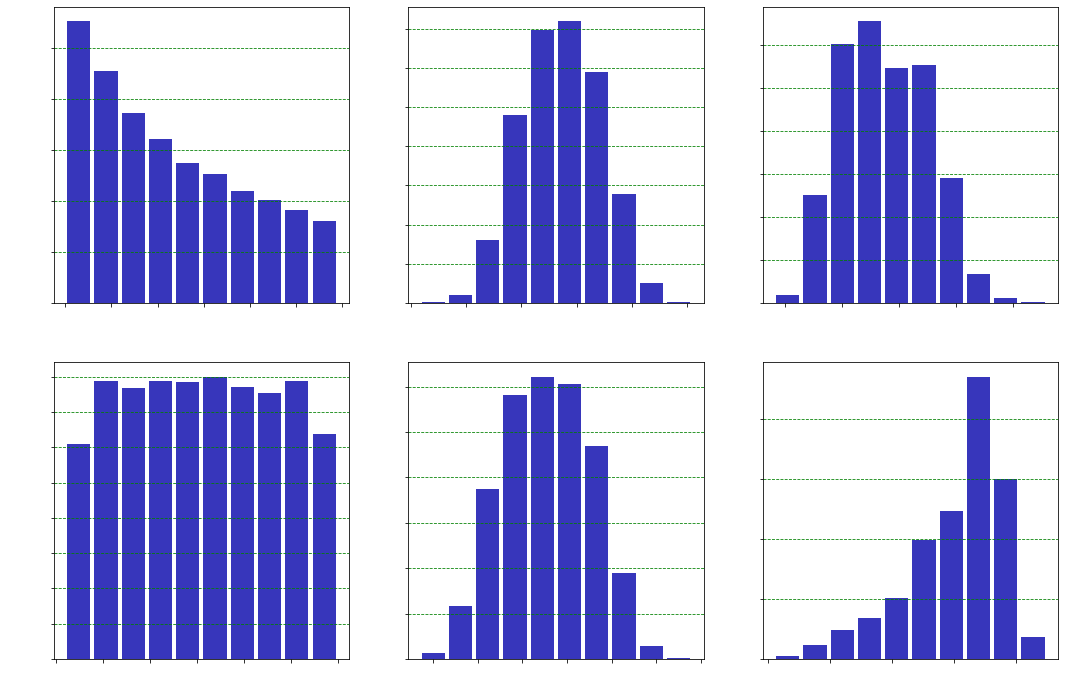

In [15]:
plt.figure(figsize= (18,12))
features = ["Age", "Height","Weight","Duration","Heart_Rate","Body_Temp"]
m = len(features)
for i in range(m):
    plt.subplot(2,3,i+1)
    plt.hist(calories_burnt[features[i]],color='#0504aa',alpha = 0.8,rwidth=0.85)
    plt.xlabel("{}".format(features[i]),c = "w")
    if i == 0:
        plt.ylabel("Frequancy",c = "w")
    plt.xticks(c ="w")
    plt.yticks(c = "w")
    plt.grid(axis="y",linestyle = "--",c = "g")
    
plt.show()

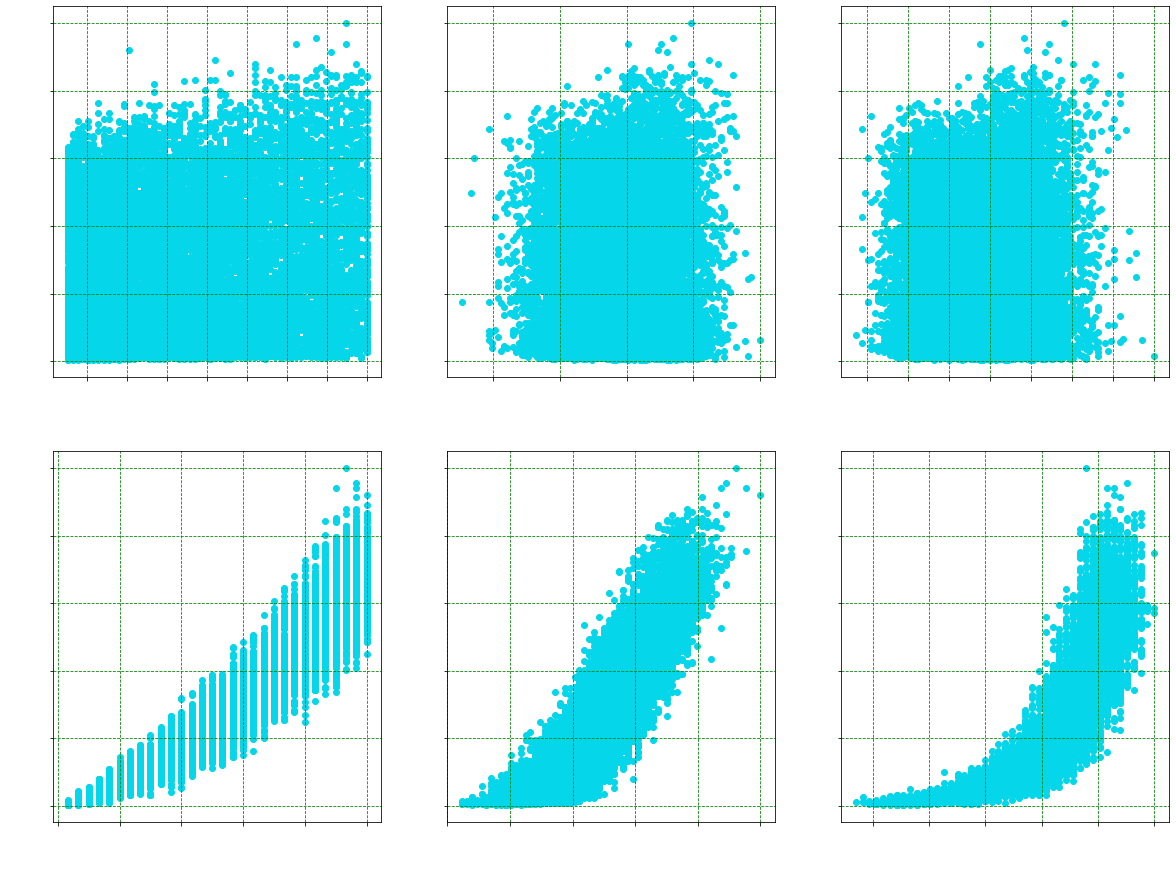

In [34]:
plt.figure(figsize= (20,15))
features_all = ["Age", "Height","Weight", "Duration", "Heart_Rate", "Body_Temp"]
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.scatter(calories_burnt["{}".format(features_all[i])],calories_burnt["Calories"],color = "#05D6E9")
    plt.xlabel("{}".format(features_all[i]),size = 20,c = "w")
    plt.ylabel("Calories",size = 20,c = "w")
    plt.xticks(c ="w")
    plt.yticks(c = "w")
    plt.grid(linestyle = "--",c = "g")

plt.show()

In [17]:
# represinting the gender with two numbers(1 = male)  and (0 = female)
calories_burnt.loc[calories_burnt["Gender"] == "male","Gender" ] = 1
calories_burnt.loc[calories_burnt["Gender"] == "female", "Gender"] = 0

#scaling features 
for i in np.array(calories_burnt.columns):
    calories_burnt["{}".format(i)] = calories_burnt["{}".format(i)] / max(calories_burnt["{}".format(i)])

calories_burnt.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0.736681,1.0,0.860759,0.855856,0.712121,0.966667,0.820312,0.983133,0.735669
1,0.743098,0.0,0.253165,0.747748,0.454545,0.466667,0.734375,0.971084,0.210191
2,0.559003,1.0,0.873418,0.806306,0.598485,0.166667,0.687500,0.932530,0.082803
3,0.809035,0.0,0.430380,0.806306,0.537879,0.433333,0.781250,0.975904,0.226115
4,0.888612,0.0,0.341772,0.693694,0.439394,0.333333,0.632812,0.959036,0.111465


In [18]:
x_ = np.array(calories_burnt.drop(columns=["User_ID","Calories"]))
y_ = np.array(calories_burnt["Calories"])
# w_inti ,b_init are random values 
w_inti = [ 0.05, 0.1 ,-0.6 , 0.2, 1.0, 5 ,15  ]
b_init = -18.0

# Spliting data (x_,y_)into Training and Testing data

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train ,y_test = train_test_split(x_,y_,test_size=0.2)

# Training Modle by running gradent descent multiple times in oreder to tune the hyperparameters 

In [28]:
w, b , iter_num_i ,cost_of_iter_num_i = gradent_descent(x_train,y_train,w_inti,b_init,0.3,6001,0.0000001)

iter 0: w = [ 0.02499657  0.07502451 -0.63600746  0.17388538  0.92127861  4.95116397
 14.95201118] & b = -18.04592384607849 ========>  Cost:  0.2287941125985682 

iter 1000: w = [-0.04869319  0.13246389 -0.04061777  0.31623677 -1.09441146  3.62061
 15.48070413] & b = -16.97764688230584 ========>  Cost:  0.01705233254695673 

iter 2000: w = [-0.03739688  0.13367908  0.0761659   0.19565098 -0.91462045  2.8283565
 15.53430084] & b = -16.560530684231153 ========>  Cost:  0.014139434931468294 

iter 3000: w = [-0.02850495  0.13487322  0.16383722  0.10273172 -0.78664434  2.2794479
 15.51432095] & b = -16.218911863215272 ========>  Cost:  0.0126215507731792 

iter 4000: w = [-0.0219747   0.13594017  0.23208761  0.03247347 -0.69433214  1.89845756
 15.44308334] & b = -15.93111578044974 ========>  Cost:  0.011777459144959904 

iter 5000: w = [-0.01723368  0.13688326  0.28654332 -0.02105899 -0.62673535  1.6337557
 15.3368294 ] & b = -15.681269596185183 ========>  Cost:  0.011260216693453328 

ite

# Plloting Learning Curve

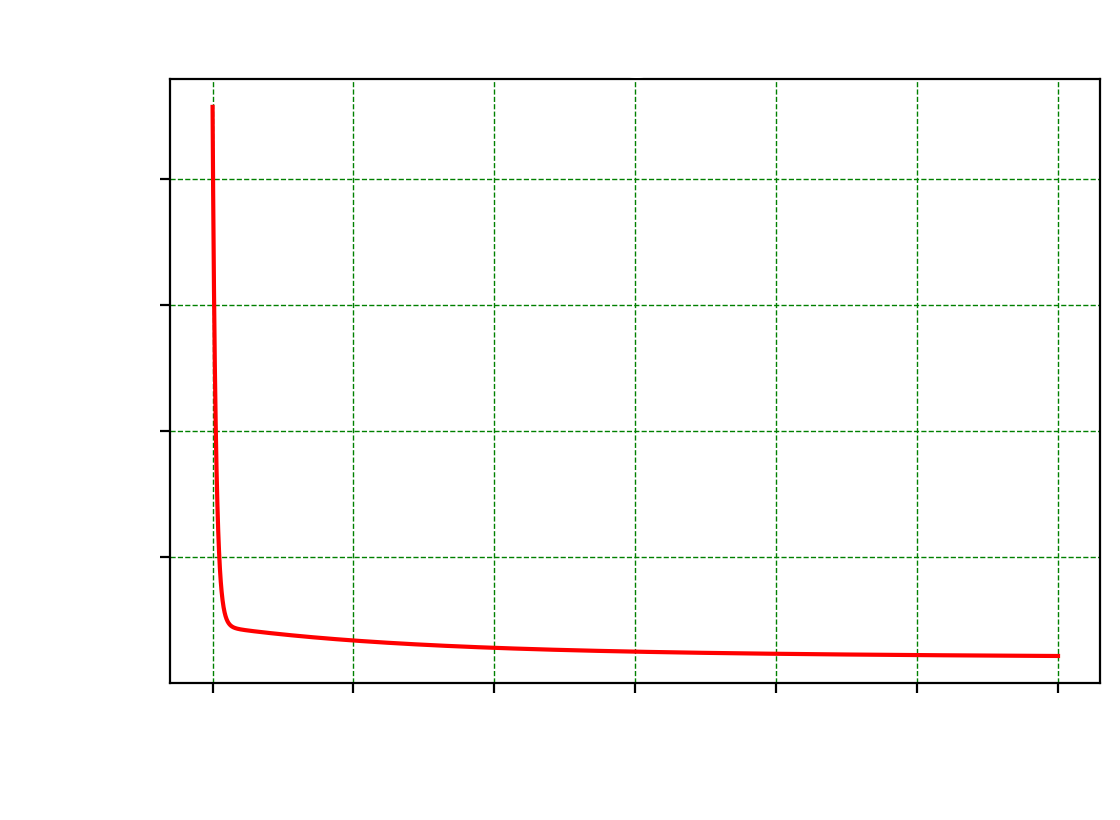

In [29]:

plt.figure(dpi = 200)
plt.plot(iter_num_i,cost_of_iter_num_i,c = 'r')

plt.title("Learning Curve ",fontdict={"fontname":'comic sans ms',"fontsize":20},color= "w")
plt.xlabel('num_iterations',fontdict={"fontname":'comic sans ms',"fontsize":20},color= "w")
plt.ylabel('Cost',fontdict={"fontname":'comic sans ms',"fontsize":20},c = 'w')
plt.xticks(c = "w")
plt.yticks(c = "w")
plt.grid(c = "g" , linestyle = "--",linewidth = 0.5)
plt.show()

In [30]:
# Testing Algorithm
predection_of_testing_data = np.array(modle(x_test,w,b))

In [31]:
# Measuring modle's accuracy to predect calories burnt 
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(predection_of_testing_data,y_test)*100 
Accuracy = 100 -mean_squared_error

In [32]:
print ("Accuracy of Model: {} % \n ".format(Accuracy))

Accuracy of Model: 97.79560021117474 % 
 
